#  Banana Navigation problem

---


### 1. Start the Environment


In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
# please do not modify the line below
env = UnityEnvironment(file_name="/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Training in the Environment


Runs the agent in the enviroment. The agent uses the following architecture for the neural nets

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #

            Linear-1            [-1, 1, 1, 128]           4,864
            Linear-2            [-1, 1, 1, 128]          16,512
            Linear-3              [-1, 1, 1, 4]             516
================================================================
Total params: 21,892

it uses one NN to train on and other to get the policy. The policy NN is updated ever 4 episodes.

The agent also uses a action replay buffer with 1000 of the mosrt recent actions to add training data to the agent.

The network is trained on an epsilon greedy policy with a minimum epsilon of 0.05 this amount is required to effectively train the model.

In [5]:
from agent1 import Agent
from collections import namedtuple, deque
#env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

n_episodes=4000
eps_start=1.0
eps_end=0.05
eps_decay=0.995

agent=Agent(state_size, action_size, 0)
"""Deep Q-Learning.

Params
======
    n_episodes (int): maximum number of training episodes
    max_t (int): maximum number of timesteps per episode
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float): minimum value of epsilon
    eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
"""
scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]
    score = 0

    while True:
        action = agent.act(state, eps)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        agent.step(state, action, reward, next_state, done)
        state = next_state # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break


Episode 100	Average Score: 0.41
Episode 200	Average Score: 2.22
Episode 300	Average Score: 6.16
Episode 400	Average Score: 8.64
Episode 500	Average Score: 11.53
Episode 600	Average Score: 12.67
Episode 626	Average Score: 13.02
Environment solved in 526 episodes!	Average Score: 13.02


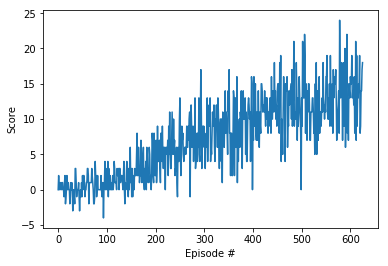

In [6]:

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
env.close()
plt.show()

### 4. Model results

As can be seen the model quickly solves the enviroment; however we can always speed it up.

### Future enhancements
future enhancement to the network would include
* Optimizing the epsilion paramater further.
* Decreasing the number of episodes before updating the policy network
* Using Prioritized Experience Replay
* Trying out a Dueling network 

In [5]:

from torchsummary import summary


model=QNetwork(37,4,0)

summary(model, (1, 1, 37))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1, 1, 128]           4,864
            Linear-2            [-1, 1, 1, 128]          16,512
            Linear-3              [-1, 1, 1, 4]             516
Total params: 21,892
Trainable params: 21,892
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.08
Estimated Total Size (MB): 0.09
----------------------------------------------------------------
